The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [2]:
# Cargar Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar Dataset
nobel=pd.read_csv("data/nobel.csv")
print(nobel.head(5))
print(nobel.columns)

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

In [22]:
#Encontrar los valores mas comunes por sexo
top_gender= nobel['sex'].value_counts().index[0]
print("\n El género con la mayor cantidad de premios nobel es :", top_gender)


 El género con la mayor cantidad de premios nobel es : Male


In [21]:
#Encontrar los valores mas comunes por país de nacimiento
top_country= nobel['birth_country'].value_counts().index[0]
print(" El país de nacimiento más común dentro de los ganadores del premio nobel es :", top_country)

 El país de nacimiento más común dentro de los ganadores del premio nobel es : United States of America


In [5]:
#Identificar la decada con el mayor ratio de nacidos en EE.UU. ganadores del nobel
nobel['winners_eeuu']= nobel['birth_country']=='United States of America'
print(nobel.head(5))

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

In [6]:
nobel['decade']=(np.floor(nobel['year']/10)*10).astype(int)
print(nobel['decade'].head(5))

0    1900
1    1900
2    1900
3    1900
4    1900
Name: decade, dtype: int64


In [8]:
prop_winners_eeuu=nobel.groupby('decade', as_index=False)['winners_eeuu'].mean()
print(prop_winners_eeuu)

    decade  winners_eeuu
0     1900      0.017544
1     1910      0.075000
2     1920      0.074074
3     1930      0.250000
4     1940      0.302326
5     1950      0.291667
6     1960      0.265823
7     1970      0.317308
8     1980      0.319588
9     1990      0.403846
10    2000      0.422764
11    2010      0.314050
12    2020      0.360000


In [19]:
print(prop_winners_eeuu.nlargest(1, 'winners_eeuu'))

max_decade_usa=prop_winners_eeuu['decade'].values[10]
print("La década con mayor proporcion de ganadores estadounidenses fue la de" ,max_decade_usa)

    decade  winners_eeuu
10    2000      0.422764
La década con mayor proporcion de ganadores estadounidenses fue la de 2000


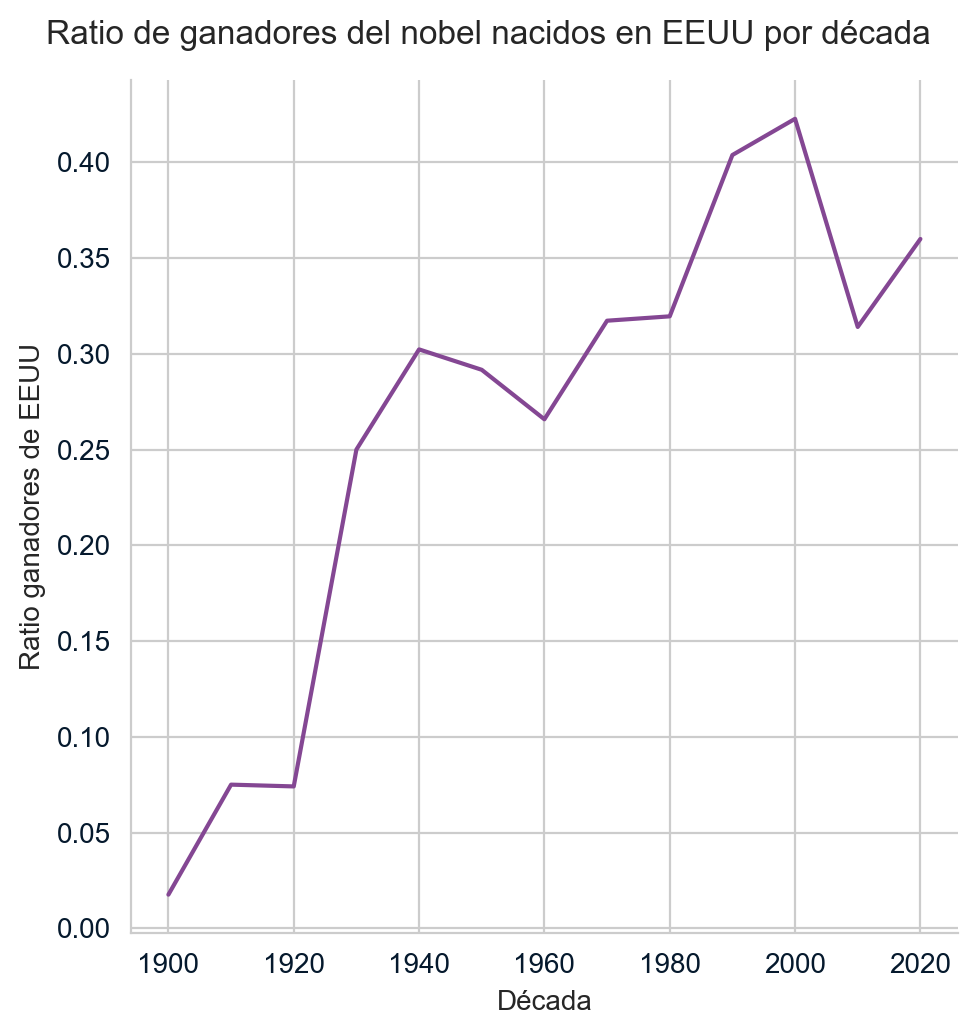

In [ ]:
sns.set_style("whitegrid")
sns.set_palette('PRGn')
g=sns.relplot(x='decade',y='winners_eeuu',data=prop_winners_eeuu,kind='line')  
g.fig.suptitle("Ratio de ganadores del nobel nacidos en EEUU por década", y=1.03)
g.set(xlabel="Década", ylabel='Ratio ganadores de EEUU')
plt.show()

    decade    category  winners_female
0     1900   Chemistry        0.000000
1     1900  Literature        0.100000
2     1900    Medicine        0.000000
3     1900       Peace        0.071429
4     1900     Physics        0.076923
..     ...         ...             ...
67    2020   Economics        0.111111
68    2020  Literature        0.500000
69    2020    Medicine        0.125000
70    2020       Peace        0.285714
71    2020     Physics        0.166667

[72 rows x 3 columns]


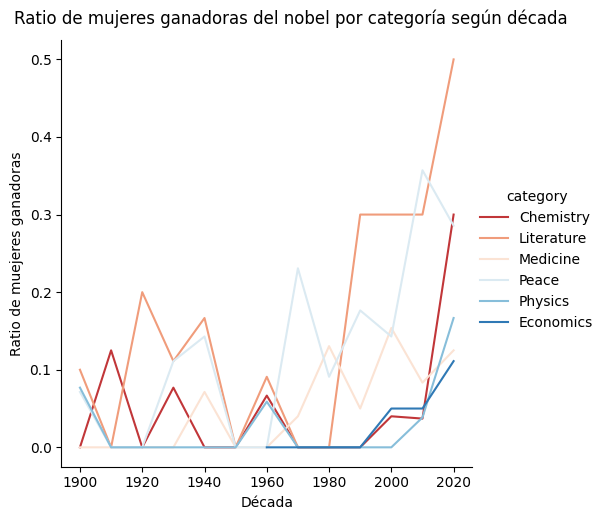

In [10]:
#Identificar la decada y la categoría con el mayor ratio de mujeres ganadoras del nobel
nobel['winners_female']= nobel['sex']=='Female'

prop_winners_female=nobel.groupby(['decade','category'], as_index=False)['winners_female'].mean() 
print(prop_winners_female)

max_female_decade_category = prop_winners_female[prop_winners_female['winners_female'] == prop_winners_female['winners_female'].max()][['decade', 'category']]

max_female_dict={max_female_decade_category['decade'].values[0]:max_female_decade_category['category'].values[0]}

sns.set_palette("RdBu")
g1=sns.relplot(x='decade',y='winners_female',data=prop_winners_female,kind='line',hue='category')  
g1.fig.suptitle("Ratio de mujeres ganadoras del nobel por categoría según década", y=1.03)
g1.set(xlabel="Década", ylabel='Ratio de muejeres ganadoras')
plt.show()


In [15]:
#Encontrar la primer mujer en recibir un premio nobel
first_woman=nobel[nobel['winners_female']].nsmallest(1,'year')
first_woman_name=first_woman['full_name'].values[0]
first_woman_category=first_woman['category'].values[0]
print(f"\n La primer mujer en ganar el premio nobel fue {first_woman_name}, en la categoría de {first_woman_category}.")



 La primer mujer en ganar el premio nobel fue Marie Curie, née Sklodowska, en la categoría de Physics.


In [16]:
counts=pd.Series(nobel['full_name'].value_counts())
repeats=counts[counts>=2].index
repeat_list=list(repeats)
print("\n Los ganadores repetidos son :", repeat_list)



 Los ganadores repetidos son : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling']
